<a href="https://colab.research.google.com/github/lavahammer/Zomato_Geospatial_Analysis/blob/main/Zomato_Geospatial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [408]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning datasets/Zomato geospatial/zomato.csv')

In [409]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [411]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [412]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [413]:
df.shape

(51717, 17)

In [414]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [415]:
df['name'].nunique()

8792

In [416]:
#getting all NaN features
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [417]:
# Print % of missing values

for feature in feature_na:
  print('{} has {} % missing values'.format(feature,np.round((df[feature].isnull().sum()/len(df))*100,4)))


rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [418]:
df['rate'].isnull().value_counts()

False    43942
True      7775
Name: rate, dtype: int64

In [419]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [420]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [421]:
df.shape

(43942, 17)

In [422]:
df['rate_new'] = df['rate'].str.split(pat='/',expand=True)[0]

In [423]:
df['rate_new'].isnull().value_counts()

False    43942
Name: rate_new, dtype: int64

In [424]:
df = df.drop(['rate'],axis=1) #Dropping old rate column

In [425]:
df.shape

(43942, 17)

In [426]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rate_new'],
      dtype='object')

In [427]:
df= df[['url', 'address', 'name','rate_new','online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)']]

df.rename(columns = {'rate_new':'rate'}, inplace=True)
df.head()

,url,address,name,rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [428]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [429]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)

In [430]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [431]:
df['rate'] = df['rate'].astype(float) #converting to numeric

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          43942 non-null  object 
 1   address                      43942 non-null  object 
 2   name                         43942 non-null  object 
 3   rate                         43942 non-null  float64
 4   online_order                 43942 non-null  object 
 5   book_table                   43942 non-null  object 
 6   votes                        43942 non-null  int64  
 7   phone                        43110 non-null  object 
 8   location                     43942 non-null  object 
 9   rest_type                    43791 non-null  object 
 10  dish_liked                   23609 non-null  object 
 11  cuisines                     43931 non-null  object 
 12  approx_cost(for two people)  43690 non-null  object 
 13  reviews_list    

**CALCULATE AVERAGE RATING FOR EACH RESTAURANT**:

In [433]:
df.groupby('name')['rate'].mean().nlargest(20)

name
Asia Kitchen By Mainland China                                                      4.900000
Byg Brewski Brewing Company                                                         4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine    4.900000
Punjab Grill                                                                        4.871429
Belgian Waffle Factory                                                              4.844828
Flechazo                                                                            4.800000
O.G. Variar & Sons                                                                  4.800000
The Pizza Bakery                                                                    4.800000
AB's - Absolute Barbecues                                                           4.789474
Barbecue by Punjab Grill                                                            4.750000
CTR                                                              

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 131 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 130 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 131 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 130 missing from current font.



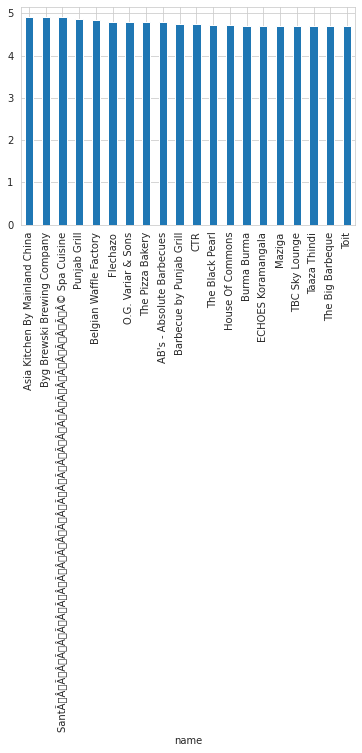

In [434]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [435]:
df_rate = df.groupby('name')['rate'].mean().reset_index()
df_rate.columns=['restaurant','rating']
df_rate

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
7157,i-Bar - The Park Bangalore,3.800000
7158,iFruit Live Ice Creams,3.400000
7159,iSpice Resto Cafe,3.700000
7160,nu.tree,4.314286


In [436]:
type(df_rate)

pandas.core.frame.DataFrame

**RATING DISTRIBUTION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



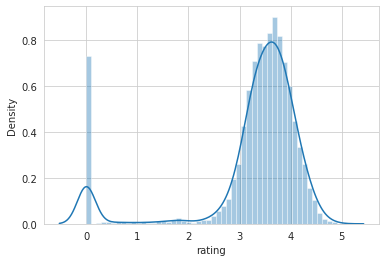

In [437]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

*Restaurants having rating > 4.5 are very rare*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc31add3190>]],
      dtype=object)

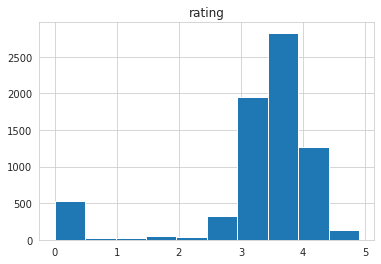

In [438]:
df_rate.hist()

**Identifying top restaurant chains in Bengaluru**

In [439]:
df['name'].value_counts().nlargest(20)

Cafe Coffee Day        89
Onesta                 85
Empire Restaurant      71
Just Bake              68
Five Star Chicken      68
Kanti Sweets           68
Petoo                  64
Baskin Robbins         63
Pizza Hut              62
Polar Bear             61
Sweet Truth            60
Domino's Pizza         60
KFC                    60
Beijing Bites          60
McDonald's             59
Smoor                  59
Subway                 59
Faasos                 57
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

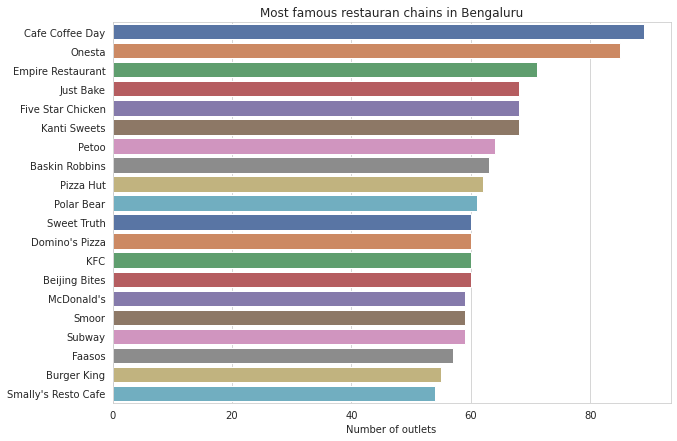

In [440]:
plt.figure(figsize=(10,7))
chains = df['name'].value_counts().nlargest(20)
sns.barplot(x=chains,y=chains.index, palette = 'deep')
plt.title("Most famous restauran chains in Bengaluru")
plt.xlabel("Number of outlets")

*How many restaurants do not accept orders online*

([<matplotlib.patches.Wedge at 0x7fc31b573a90>,
 [Text(-0.481488774517003, 0.9890240442042423, 'accepted'),
  Text(0.4814888671161146, -0.9890239991240055, 'not accepted')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.2626302911542443, -0.5394676358858211, '35.6%')])

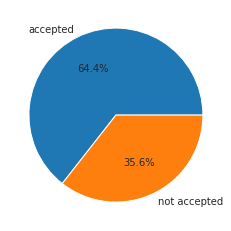

In [441]:
x = df['online_order'].value_counts()

plt.pie(x,labels=['accepted','not accepted'],autopct='%1.1f%%')

In [442]:
df['online_order'].value_counts('normalize')

Yes    0.644213
No     0.355787
Name: online_order, dtype: float64

In [443]:
import plotly.express as px
df['online_order'].value_counts()
fig = px.pie(df, values = x, names = ['accepted','not accepted'], title='Pie Chart')
fig.show()

**Restaurants providing table booking**

In [444]:
x = df['book_table'].value_counts()
x

No     37509
Yes     6433
Name: book_table, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc31aeab7d0>,
 [Text(-0.9856961240827233, 0.4882654513359477, 'No Booking'),
  Text(0.9856961240827234, -0.48826545133594734, 'Booking')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.5376524313178491, -0.2663266098196076, '14.6%')])

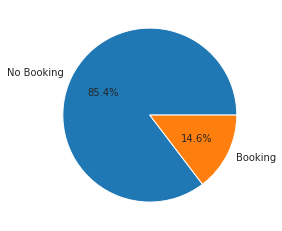

In [445]:
plt.pie(x,labels=['No Booking','Booking'],autopct='%1.1f%%')

In [446]:
import plotly.graph_objs as go
from plotly.offline import iplot
df['book_table'].value_counts()
trace = go.Pie(values = x, labels=['No Booking','Booking'], hoverinfo = 'label+percent', textinfo = 'value', textfont=dict(size=25),pull=[0,0,0,0.2,0],title='Pie Chart')
iplot([trace])

**Restaurant type analysis**

In [447]:
df['rest_type'].isnull().value_counts()

False    43791
True       151
Name: rest_type, dtype: int64

In [448]:
df['rest_type'].dropna(inplace=False)
df['rest_type'].isna().value_counts()

False    43791
True       151
Name: rest_type, dtype: int64

In [449]:
df[df['rest_type'].isna()]

,url,address,name,rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
999,https://www.zomato.com/bangalore/mughlai-kitch...,"77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...",Mughlai Kitchen,3.5,Yes,No,269,+91 9663197947\r\r\n+91 9986692090,BTM,NaN,"Momos, Oreo Shake","Mughlai, North Indian, Chinese, Momos",600,"[('Rated 5.0', ""RATED\n Ordered Chicken Kadai...","['Fry Chicken Kabab [5 Pieces]', 'Fry Chicken ...",Delivery,Bannerghatta Road
1300,https://www.zomato.com/bangalore/eat-joy-resta...,"21, Saifee Apartment, 5th Cross, 22nd Main, Ne...",Eat & Joy Restaurant,3.0,Yes,No,7,+91 9945052352,JP Nagar,NaN,NaN,"Fast Food, Finger Food",300,"[('Rated 1.0', 'RATED\n I had ordered for one...",[],Delivery,Bannerghatta Road
1376,https://www.zomato.com/bangalore/kababish-rest...,"7th Main, 18th Cross NS Palya, 2nd Stage",Kababish Restaurant,3.6,Yes,No,15,+91 8050732123\r\n00 805074123,BTM,NaN,NaN,"North Indian, Chinese, Arabian",700,"[('Rated 2.0', 'RATED\n You would only go to ...",[],Delivery,Bannerghatta Road
1637,https://www.zomato.com/bangalore/ammis-biryani...,"3, 1st Cross, Kalyani Kala Mandir, Bannerghatt...",Ammi's Biryani,2.4,No,No,392,+91 9513777152\r\n080 39457777,Bannerghatta Road,NaN,"Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...","Biryani, North Indian",500,"[('Rated 3.0', 'RATED\n If you a spicy biriya...",[],Delivery,Bannerghatta Road
2044,https://www.zomato.com/bangalore/ammis-biryani...,"3, 1st Cross, Kalyani Kala Mandir, Bannerghatt...",Ammi's Biryani,2.4,No,No,392,+91 9513777152\r\n080 39457777,Bannerghatta Road,NaN,"Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...","Biryani, North Indian",500,"[('Rated 3.0', 'RATED\n If you a spicy biriya...",[],Dine-out,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49916,https://www.zomato.com/bangalore/parathas-kitc...,"32/1,1st Floor, Next To Kaveri Bank, Bellandur...",Paratha's Kitchen,2.8,Yes,No,33,+91 9701246058,Bellandur,NaN,"Paratha, Chole","North Indian, South Indian",200,"[('Rated 1.0', ""RATED\n Pathetic. Ordered alo...","['Paneer Paratha', 'Sathu Paratha', 'Aloo Para...",Dine-out,Sarjapur Road
49956,https://www.zomato.com/bangalore/new-andhra-sp...,"573, Kamakamma, Bellandur Main Road, Bellandur...",New Andhra Spicy,3.6,Yes,No,11,+91 9052897378,Bellandur,NaN,NaN,"North Indian, Chinese, Andhra, South Indian, B...",200,"[('Rated 5.0', 'RATED\n amazing food\nGood ta...",[],Dine-out,Sarjapur Road
50318,https://www.zomato.com/bangalore/special-birya...,"107, Praveen Transport Complex, ITPL Back Gate...",Special Biryani House,3.2,Yes,No,202,+91 9164859311\n+91 9164871033,Whitefield,NaN,NaN,"North Indian, Biryani, Chinese",400,"[('Rated 4.0', 'RATED\n Had ordered spicy chi...",[],Delivery,Whitefield
50838,https://www.zomato.com/bangalore/vijayawada-he...,"1, 1st Cross, Ambedkar Nagar, Opposite Royal M...",Vijayawada Heights,3.2,Yes,No,8,080 43747899,Whitefield,NaN,NaN,North Indian,600,"[('Rated 1.0', ""RATED\n Horrible food. Too ex...",[],Delivery,Whitefield


In [450]:
df['rest_type'].isnull().value_counts()

False    43791
True       151
Name: rest_type, dtype: int64

In [451]:
len(df['rest_type'].unique())

88

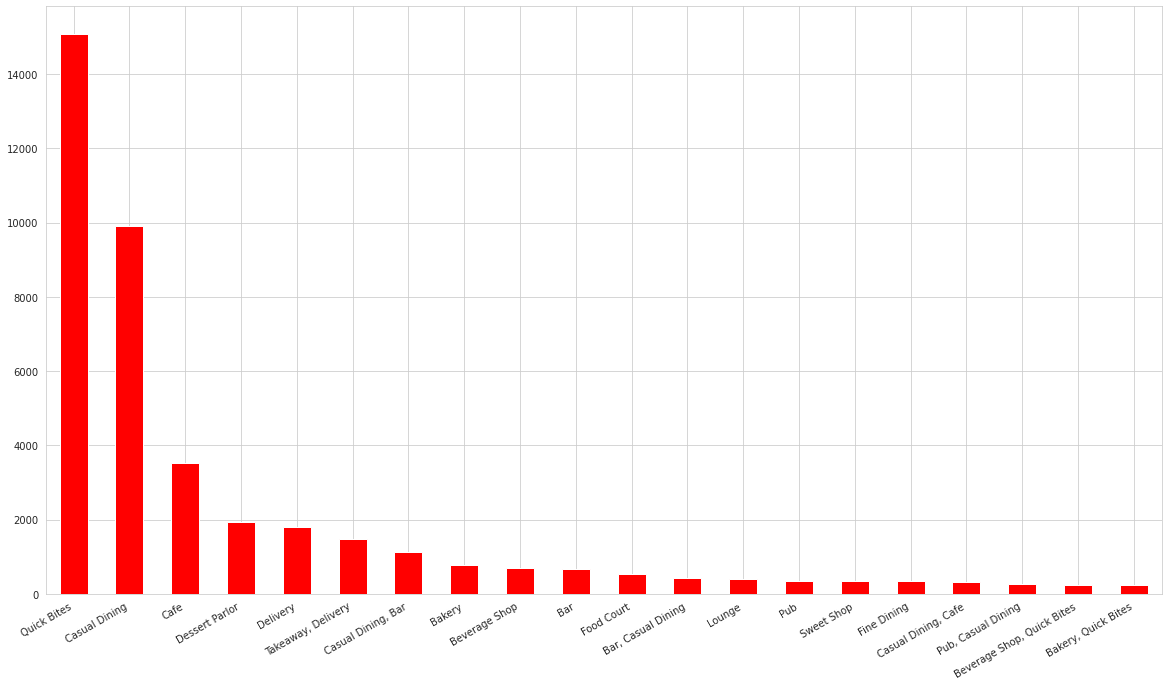

In [452]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

In [453]:
trace1 = go.Bar( 
                 x = df['rest_type'].value_counts().nlargest(20).index,
                 y = df['rest_type'].value_counts().nlargest(20),
                 name = 'rest_type'
               )

iplot([trace1])

*Quick Bites dominates*

**Highest voted restaurants**

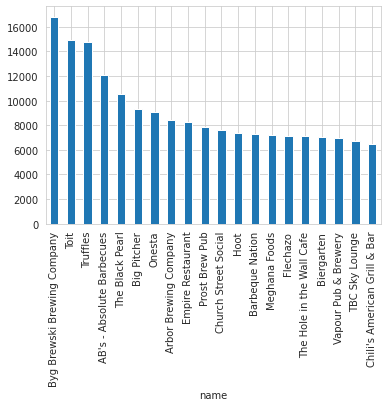

In [454]:
df.groupby('name')['votes'].max().nlargest(20).plot.bar()

In [455]:
trace1 = go.Bar(
                 x =  df.groupby('name')['votes'].max().nlargest(20).index,
                 y =  df.groupby('name')['votes'].max().nlargest(20),
                 name = 'name'
               )
iplot([trace1])

**Location wise Restaurant information**

In [456]:
test = df.groupby('location')['name'].unique().reset_index()
test.columns = (['location','rsrs'])
test

,location,rsrs
0,BTM,"[Sankranthi Veg Restaurant, Hearts Unlock Cafe..."
1,Banashankari,"[Jalsa, Spice Elephant, San Churro Cafe, Addhu..."
2,Banaswadi,"[Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi..."
3,Bannerghatta Road,"[Deja Vu Resto Bar, Fattoush, Empire Restauran..."
4,Basavanagudi,"[Grand Village, Timepass Dinner, Srinathji's C..."
...,...,...
87,West Bangalore,"[FreshMenu, Fit Dish Fetish, Garden City Mobil..."
88,Whitefield,"[Imperio Cafe, Night Diaries, LocalHost, AB's ..."
89,Wilson Garden,"[Tree Top, Sahana's (Nati Style), Karavali Kol..."
90,Yelahanka,"[Prashanth Naati Corner, Cheta's Kitchen, Twis..."


In [457]:
test['r_length'] = test['rsrs'].str.len()
test = test[['location','r_length']]
test.sort_values('r_length').tail(10)

,location,r_length
6,Bellandur,284
31,Jayanagar,311
3,Bannerghatta Road,362
29,JP Nagar,400
27,Indiranagar,467
19,Electronic City,518
55,Marathahalli,525
22,HSR,553
0,BTM,581
88,Whitefield,634


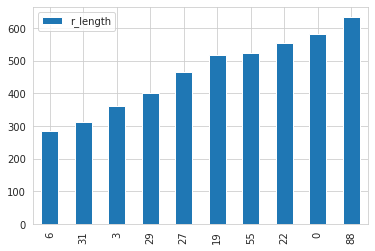

In [458]:
test.sort_values('r_length').tail(10).plot.bar()

In [459]:
trace1 = go.Bar(
                 x =  test['location'],
                 y =  test['r_length'].nlargest(10),
                 name = 'Priority'
               )
iplot([trace1])

In [460]:
df.isnull().sum()

url                                0
address                            0
name                               0
rate                               0
online_order                       0
book_table                         0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**Restaurant Types**

In [461]:
(df['rest_type'].value_counts('normalize').nlargest(20))*100

Quick Bites                   34.420315
Casual Dining                 22.659907
Cafe                           8.054166
Dessert Parlor                 4.427850
Delivery                       4.089881
Takeaway, Delivery             3.361421
Casual Dining, Bar             2.605558
Bakery                         1.769770
Beverage Shop                  1.607636
Bar                            1.509443
Food Court                     1.201160
Bar, Casual Dining             0.959101
Lounge                         0.904295
Pub                            0.812952
Sweet Shop                     0.801535
Fine Dining                    0.783266
Casual Dining, Cafe            0.728460
Pub, Casual Dining             0.582311
Beverage Shop, Quick Bites     0.557192
Bakery, Quick Bites            0.534356
Name: rest_type, dtype: float64

**Variety Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Popular Cuisines')

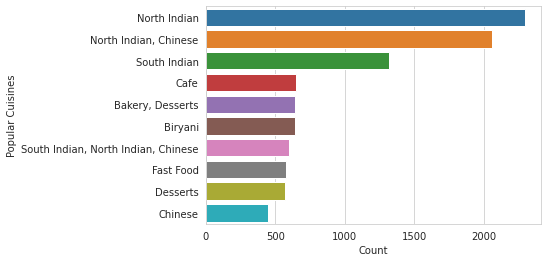

In [462]:
cuisines = df['cuisines'].value_counts().nlargest(10)
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.ylabel('Popular Cuisines')

**Cost Analysis**

In [463]:
df.head()

,url,address,name,rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [464]:
df.rename(columns ={'approx_cost(for two people)':'2ppl_a_cost'},inplace=True)

In [465]:
df['2ppl_a_cost'].isna().value_counts()

False    43690
True       252
Name: 2ppl_a_cost, dtype: int64

In [466]:
df.dropna(axis='index',subset=['2ppl_a_cost'],inplace=True)
df['2ppl_a_cost'].isna().value_counts()

False    43690
Name: 2ppl_a_cost, dtype: int64

In [467]:
df['2ppl_a_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [468]:
df['2ppl_a_cost'] = df['2ppl_a_cost'].str.replace(',','')
df['2ppl_a_cost'] = df['2ppl_a_cost'].astype(int)
df['2ppl_a_cost'].describe()

count    43690.000000
mean       594.270222
std        458.761551
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: 2ppl_a_cost, dtype: float64

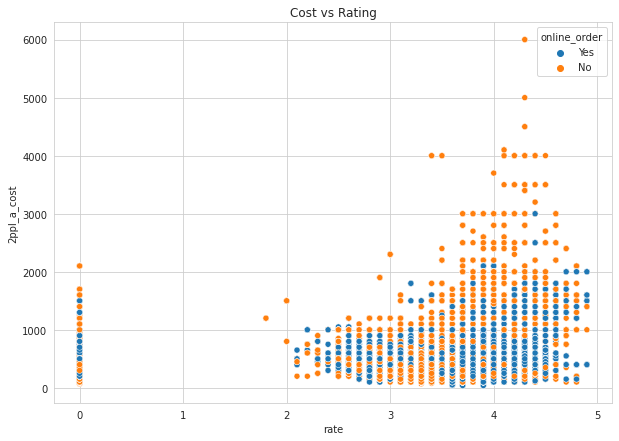

In [469]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='rate',y='2ppl_a_cost',hue='online_order',data=df)
plt.title("Cost vs Rating")
plt.show()

*Lower cost items have better rating and acceptance online*

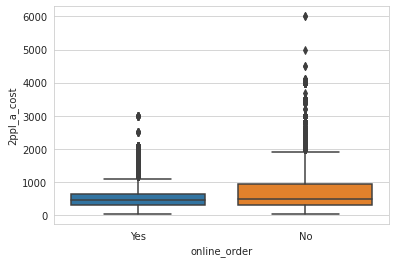

In [470]:
sns.boxplot(x='online_order',y='2ppl_a_cost',data=df)

In [471]:
fig= px.box(df,x='online_order',y='2ppl_a_cost')
fig.show()

*Restaurants accepting order online are more affordable than restaurants that do not*

In [472]:
df['2ppl_a_cost'].max()

6000

In [473]:
df[df['2ppl_a_cost']==df['2ppl_a_cost'].max()]

,url,address,name,rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,2ppl_a_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
19139,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,4.3,No,Yes,126,080 30571234\r\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
45618,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,4.3,No,Yes,128,080 30571234\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



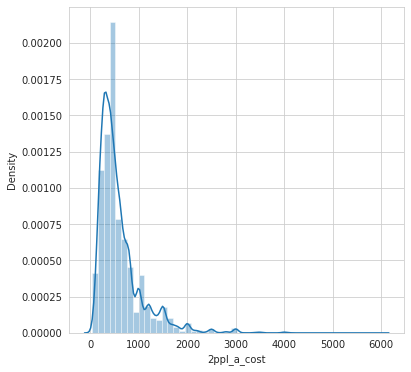

In [474]:
#distribution of cost of 2 people
plt.figure(figsize=(6,6))
sns.distplot(df['2ppl_a_cost'])
plt.show()

In [475]:
px.histogram(df,x='2ppl_a_cost')

In [476]:
df[df['2ppl_a_cost']==df['2ppl_a_cost'].max()].loc[:,('name','cuisines','dish_liked')]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [477]:
data = df.copy()

In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43690 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              43690 non-null  object 
 1   address          43690 non-null  object 
 2   name             43690 non-null  object 
 3   rate             43690 non-null  float64
 4   online_order     43690 non-null  object 
 5   book_table       43690 non-null  object 
 6   votes            43690 non-null  int64  
 7   phone            43099 non-null  object 
 8   location         43690 non-null  object 
 9   rest_type        43541 non-null  object 
 10  dish_liked       23474 non-null  object 
 11  cuisines         43682 non-null  object 
 12  2ppl_a_cost      43690 non-null  int64  
 13  reviews_list     43690 non-null  object 
 14  menu_item        43690 non-null  object 
 15  listed_in(type)  43690 non-null  object 
 16  listed_in(city)  43690 non-null  object 
dtypes: float64(1

In [479]:
data.set_index('name',inplace=True)

In [480]:
data.head()

,url,address,rate,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,2ppl_a_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",4.1,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
Spice Elephant,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",4.1,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
San Churro Cafe,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",3.8,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",3.7,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Grand Village,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",3.8,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Geospatial analysis

In [481]:
len(df['location'].unique())

92

In [482]:
locations = pd.DataFrame({'Name':df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [483]:
locations['new_Name'] = 'Bangalore ' + locations['Name']
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [484]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [485]:
from geopy.geocoders import Nominatim

In [486]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [487]:
locations['geo_loc'] = lat_lon

In [488]:
locations.head() #Latitutde and Longitude of each location using geopy

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,Bangalore Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [489]:
locations.isna().value_counts()

Name   new_Name  geo_loc
False  False     False      91
                 True        1
dtype: int64

In [490]:
Rest_locations = df['location'].value_counts().reset_index()
Rest_locations.head()

,index,location
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [491]:
Rest_locations.columns = ['Name','Count']
Rest_locations.head()

,Name,Count
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [492]:
#Merging two datasets

In [493]:
Restaurant_locations = Rest_locations.merge(locations,how='inner',on="Name")
Restaurant_locations.dropna(inplace=True)
Restaurant_locations.head()

,Name,Count,new_Name,geo_loc
0,BTM,4237,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(12.9343774, 77.628415)"
2,HSR,2113,Bangalore HSR,"(18.1475, 41.538889)"
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)"


In [494]:
Restaurant_locations.shape

(91, 4)

In [495]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [496]:
# unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [497]:
type(lat)

tuple

In [498]:
Restaurant_locations['lat'] = lat
Restaurant_locations['lon'] = lon
Restaurant_locations.head()

,Name,Count,new_Name,geo_loc,lat,lon
0,BTM,4237,Bangalore BTM,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(12.9343774, 77.628415)",12.934377,77.628415
2,HSR,2113,Bangalore HSR,"(18.1475, 41.538889)",18.147500,41.538889
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)",12.265594,76.646540


In [499]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [500]:
basemap

In [501]:
Restaurant_locations[['lat','lon','Count']].values.tolist()

[[45.95485055, -112.49659530324134, 4237.0],
 [12.9343774, 77.628415, 2358.0],
 [18.1475, 41.538889, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1711.0],
 [44.3730577, -71.6118577, 1688.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.930292, 77.6005819, 1318.0],
 [12.9400321, 77.6203272, 1103.0],
 [40.28745, -76.964526, 1084.0],
 [12.9302645, 77.6332585, 1084.0],
 [12.9310383, 77.6781903, 1078.0],
 [12.92769875, 77.6300969, 964.0],
 [12.848759900000001, 77.64825295827616, 963.0],
 [12.924299, 77.6517653, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.93433385, 77.63040639553275, 864.0],
 [12.9755264, 77.6067902, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 745.0],
 [13.0027353, 77.5703253, 657.0],
 [12.9417261, 77.5755021, 628.0],
 [40.5763076, -74.1270894, 626.0],
 [13.052791, 77.6203393, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.996845, 77.6130165, 574.0],
 [40.7115227, -74.01043, 550.0],
 [

In [502]:
HeatMap(Restaurant_locations[['lat','lon','Count']].values.tolist(),max_zoom=20,radius=15).add_to(basemap)

In [503]:
basemap


***It is clear that restaurants tend to concentrate in Central Bangalore area. Hence, potenial entrepreneurs should explore opportunity here in HORECA business.***